In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [240]:
df = pd.read_csv('../00_data/income_pred.csv')
tst = pd.read_csv('../00_data/test_income.csv')

In [241]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [242]:
tst.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [244]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


In [245]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [246]:
tst.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,38.576196,194150.017798,10.185762,728.913237,111.929922,41.121246
std,13.079061,104945.494349,2.477511,4355.969800,442.980441,12.397005
min,17.000000,21472.000000,1.000000,0.000000,0.000000,2.000000
25%,28.000000,120925.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,181434.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,243670.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,857532.000000,16.000000,99999.000000,2415.000000,99.000000


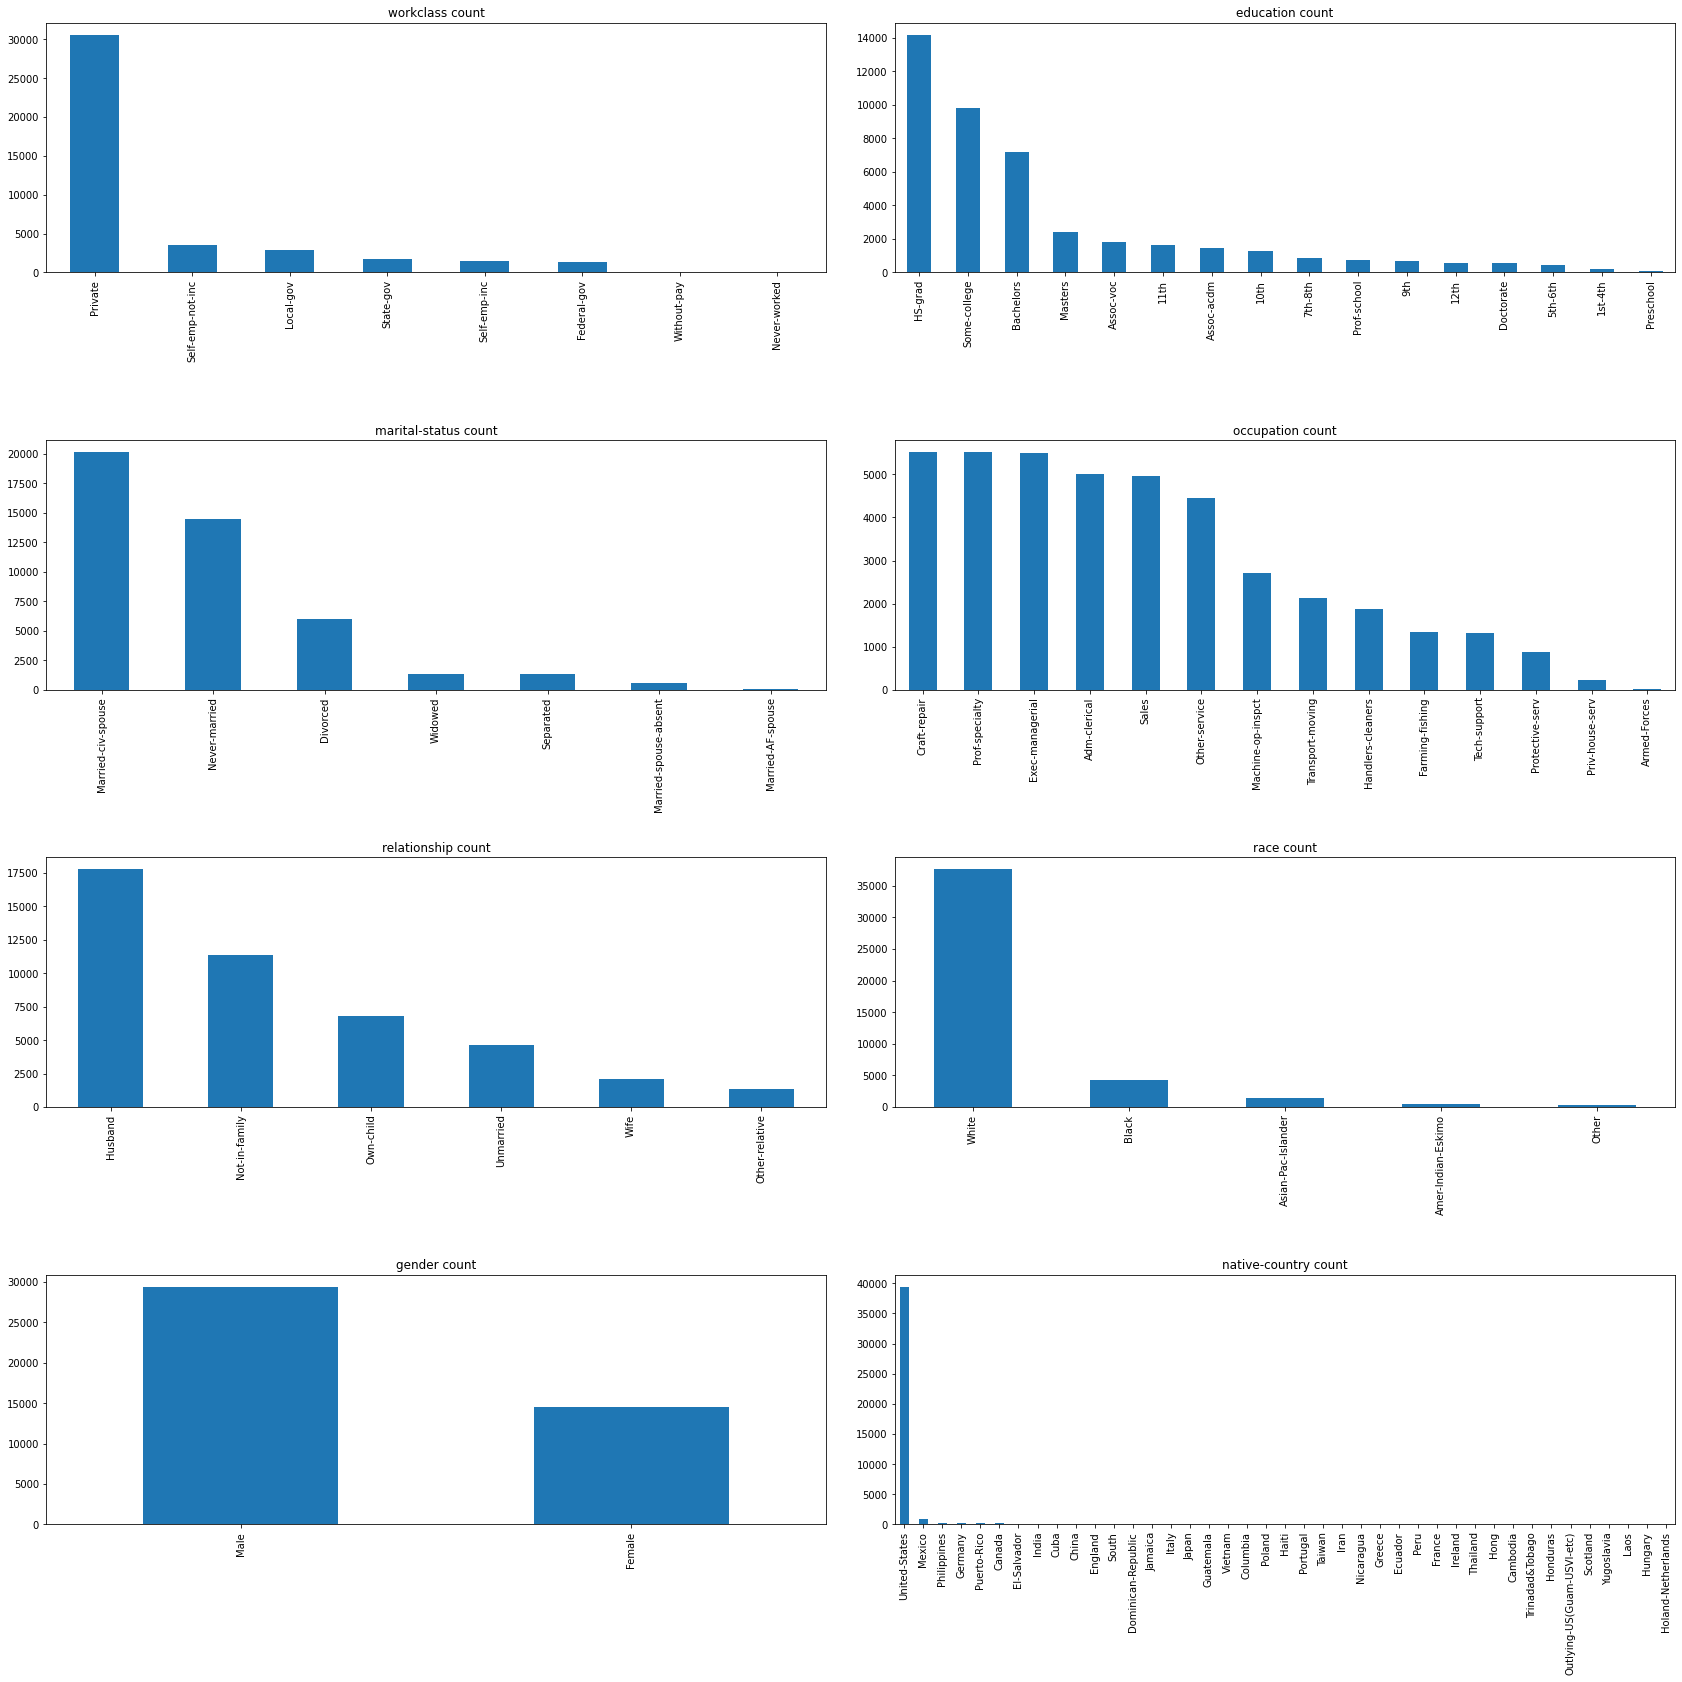

In [247]:
def value_count_plot(types):
  fig = plt.figure(figsize=(24,24))
  for i in range(len(types)):
    ax = fig.add_subplot(4,2, i+1)
    ax = df[types[i]].value_counts().plot(kind='bar')
    ax.set_title(str(types[i]) + " count")
    fig.tight_layout(pad=3.0)
  fig.show()    

types = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
value_count_plot(types)

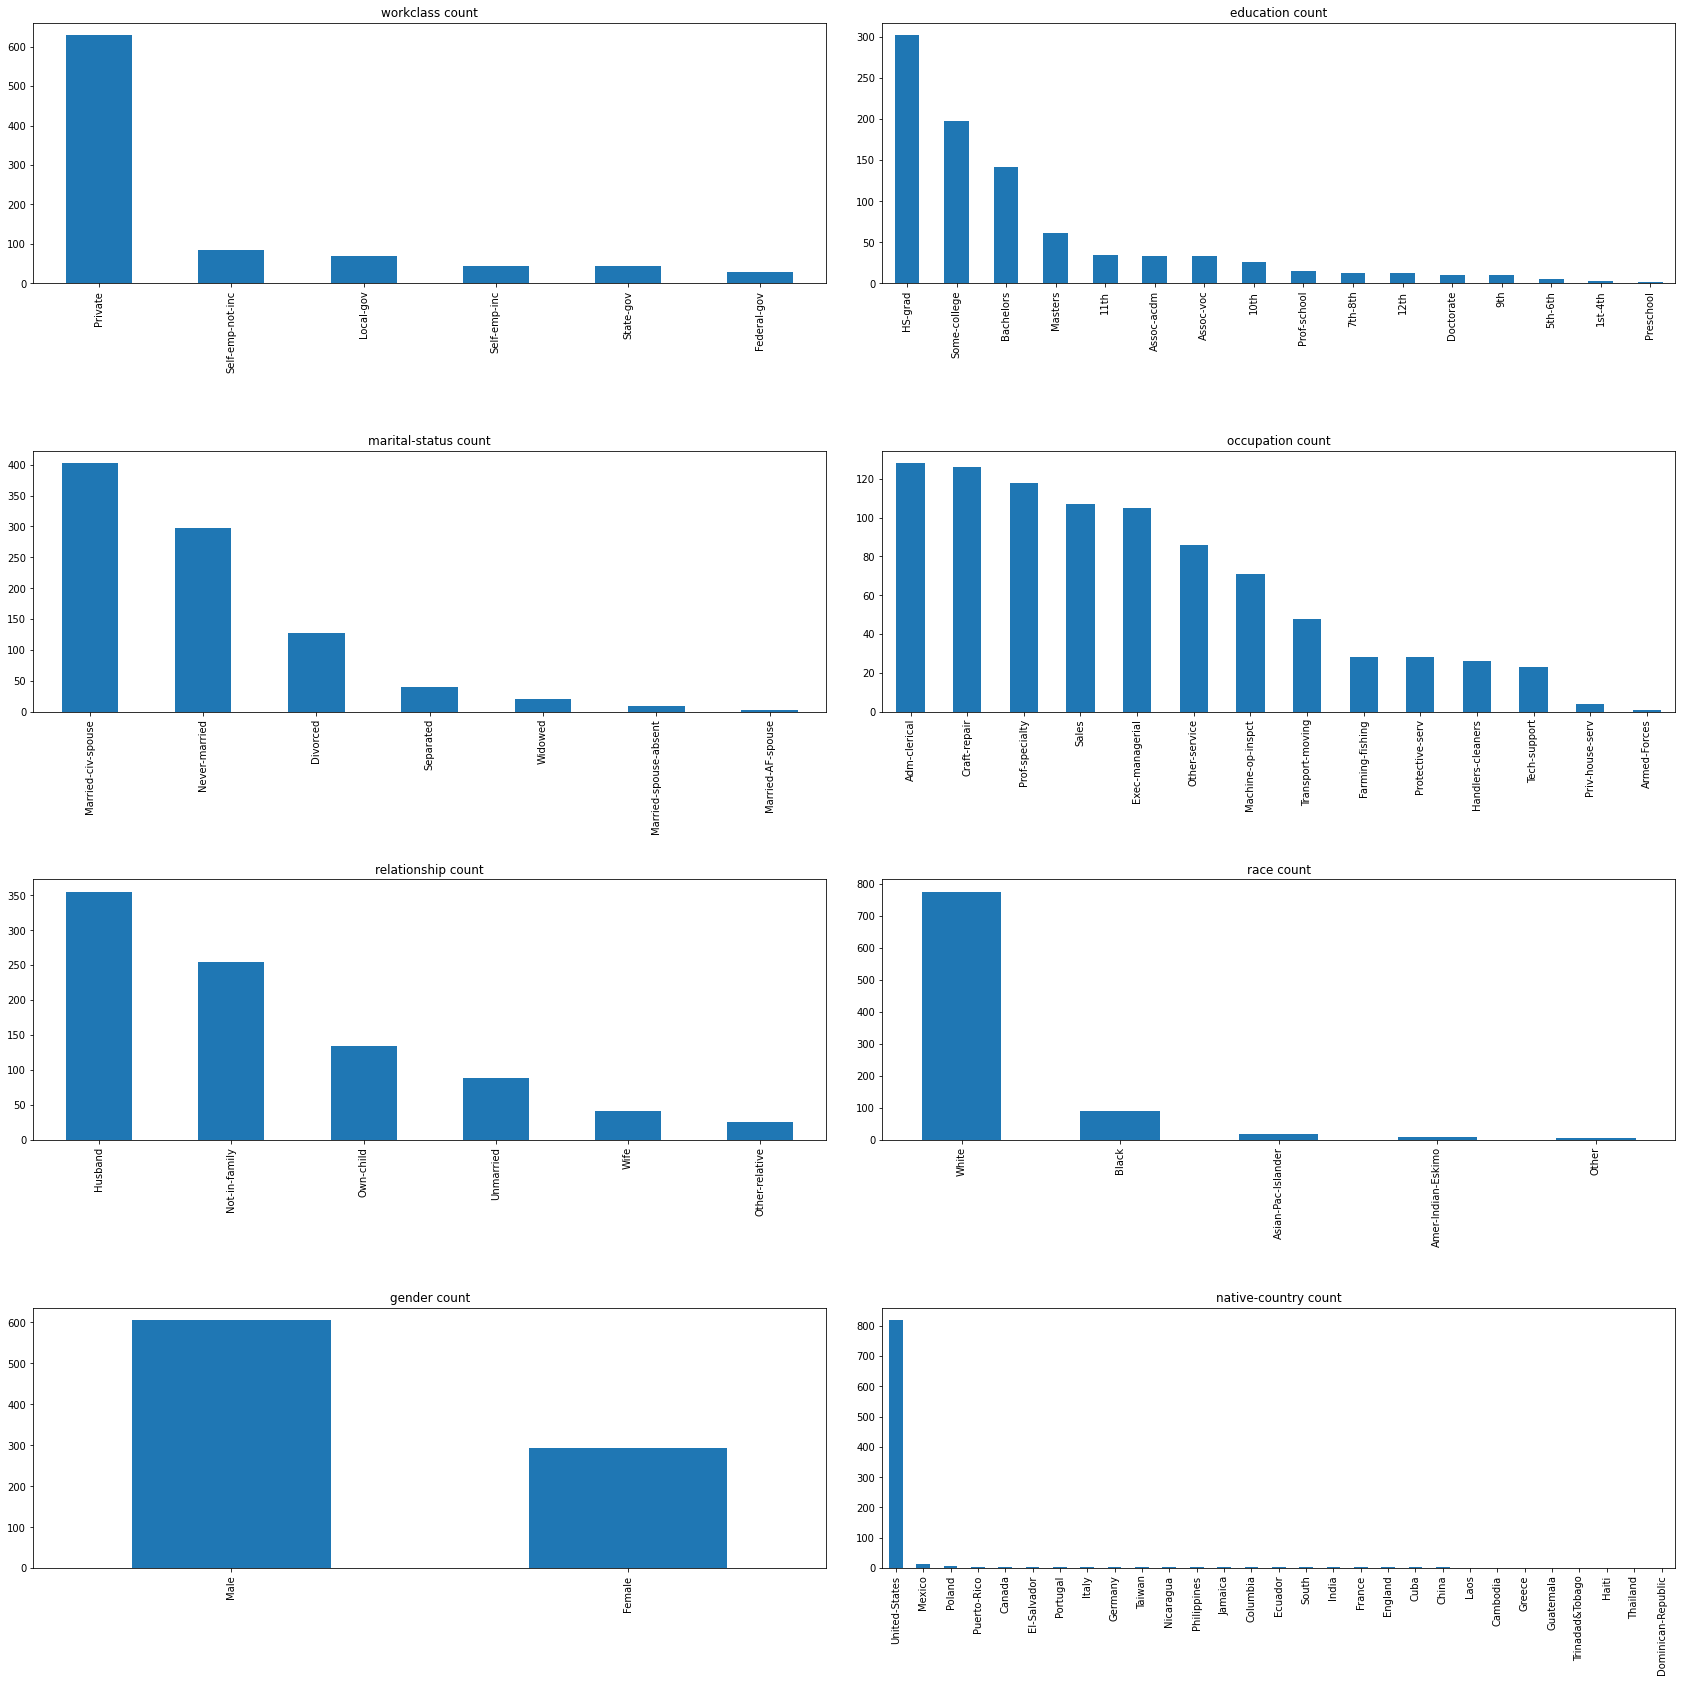

In [248]:
def value_count_plot(types):
  fig = plt.figure(figsize=(24,24))
  for i in range(len(types)):
    ax = fig.add_subplot(4,2, i+1)
    ax = tst[types[i]].value_counts().plot(kind='bar')
    ax.set_title(str(types[i]) + " count")
    fig.tight_layout(pad=3.0)
  fig.show()    

types = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
value_count_plot(types)

In [249]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [250]:
tst.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [251]:
df[df.occupation.isna()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
33,20,NaN,249087,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,0
48,19,NaN,174233,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,24,United-States,0
67,66,NaN,117778,11th,7,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,0
82,47,NaN,215620,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,12,United-States,0
88,20,NaN,432376,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,Germany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43919,19,NaN,171868,HS-grad,9,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States,0
43923,63,NaN,186809,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,0,30,United-States,1
43936,17,NaN,154938,11th,7,Never-married,NaN,Own-child,White,Male,0,0,20,United-States,0
43939,57,NaN,153788,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,99999,0,45,United-States,1


In [252]:
df[df.workclass.isna()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
33,20,NaN,249087,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,0
48,19,NaN,174233,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,24,United-States,0
67,66,NaN,117778,11th,7,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,0
82,47,NaN,215620,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,12,United-States,0
88,20,NaN,432376,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,Germany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43919,19,NaN,171868,HS-grad,9,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States,0
43923,63,NaN,186809,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,0,30,United-States,1
43936,17,NaN,154938,11th,7,Never-married,NaN,Own-child,White,Male,0,0,20,United-States,0
43939,57,NaN,153788,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,99999,0,45,United-States,1


In [253]:
df[df['native-country'].isna()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
72,53,Local-gov,228723,HS-grad,9,Divorced,Craft-repair,Not-in-family,Other,Male,0,0,40,NaN,1
119,29,Private,113870,1st-4th,2,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,NaN,0
203,66,Private,73522,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,NaN,0
213,36,Self-emp-not-inc,160120,Bachelors,13,Married-civ-spouse,Sales,Husband,Other,Male,0,0,45,NaN,0
371,55,Private,380357,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43851,45,Self-emp-not-inc,163559,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,NaN,0
43852,23,Private,216672,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,30,NaN,0
43872,29,Private,144259,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,4386,0,80,NaN,1
43880,54,Self-emp-inc,304570,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,7688,0,40,NaN,1


In [254]:
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

In [255]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

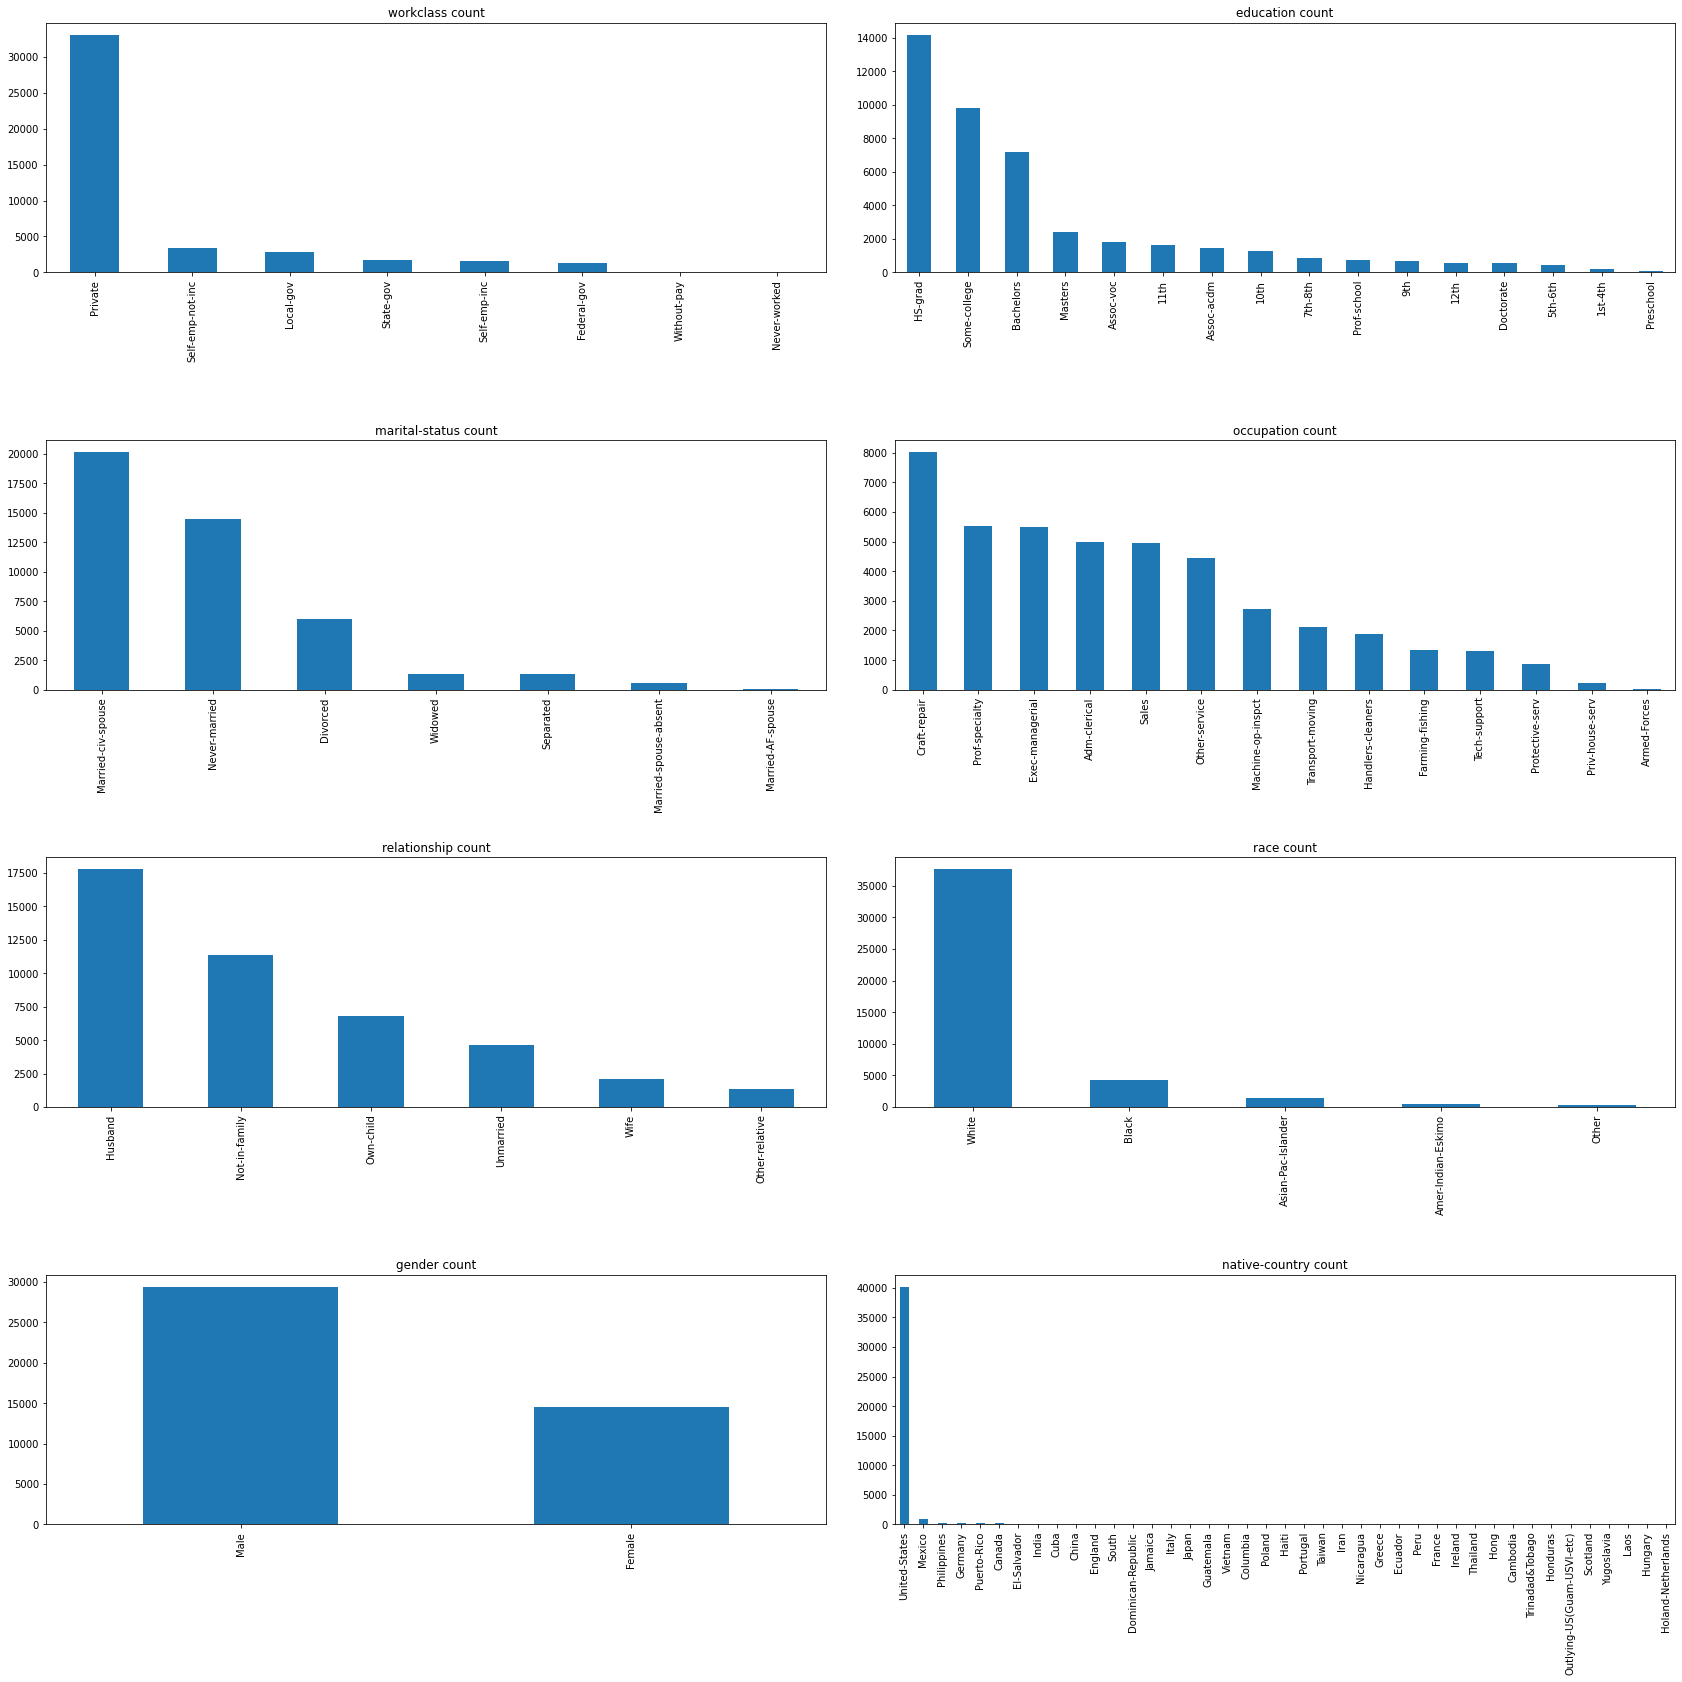

In [256]:
def value_count_plot(types):
  fig = plt.figure(figsize=(24,24))
  for i in range(len(types)):
    ax = fig.add_subplot(4,2, i+1)
    ax = df[types[i]].value_counts().plot(kind='bar')
    ax.set_title(str(types[i]) + " count")
    fig.tight_layout(pad=3.0)
  fig.show()    

types = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
value_count_plot(types)

In [257]:
df.workclass.value_counts()

Private             33085
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

In [258]:
tst.workclass.value_counts()

Private             629
Self-emp-not-inc     85
Local-gov            68
Self-emp-inc         45
State-gov            43
Federal-gov          29
Name: workclass, dtype: int64

In [259]:
# removing without-pay and never-worked as the count is very less in original data for those amd also not present in test data
df = df[(df.workclass != 'Without-pay') & (df.workclass != 'Never-worked')]
df.workclass.value_counts()

Private             33085
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Name: workclass, dtype: int64

In [260]:
# setting income_>50K as target
target = df['income_>50K']
target.value_counts()

0    33413
1    10516
Name: income_>50K, dtype: int64

In [261]:
# dropping 
# income->50K as it is target 
# education column as education-num column is a replacement for this. (higher the number higher the education level)
# native-country as it is highly skewed for United states

cols_to_drop = ['education','native-country','income_>50K']
#axis=1 depicts drop along columns
df = df.drop(cols_to_drop,axis=1)
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,67,Private,366425,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60
1,17,Private,244602,8,Never-married,Other-service,Own-child,White,Male,0,0,15
2,31,Private,174201,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40
3,58,State-gov,110199,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40
4,25,State-gov,149248,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40


In [262]:
# dropping 
# education column as education-num column is a replacement for this. (higher the number higher the education level)
# native-country as it is highly skewed for United states

cols_to_drop = ['education','native-country']
#axis=1 depicts drop along columns
tst = tst.drop(cols_to_drop,axis=1)
tst.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,39,Self-emp-not-inc,327120,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40
1,32,Private,123253,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42
2,47,Private,232628,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40
3,19,Private,374262,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20
4,46,Self-emp-not-inc,311231,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40


In [263]:
# df['gender'] = df['gender'] == 'Male'
# above code transforms gender column as True/False so using label encoder instead to keep it numerical

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.gender = label_encoder.fit_transform(df.gender)
df.head(2)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,67,Private,366425,16,Divorced,Exec-managerial,Not-in-family,White,1,99999,0,60
1,17,Private,244602,8,Never-married,Other-service,Own-child,White,1,0,0,15


In [264]:
tst.gender = label_encoder.fit_transform(tst.gender)
tst.head(2)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,39,Self-emp-not-inc,327120,9,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,40
1,32,Private,123253,12,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,42


In [265]:
# one hot encoding rest of the object(string) columns

df = pd.get_dummies(df)
print(df.shape)
df.head(2)

(43929, 45)


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,67,366425,16,1,99999,0,60,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,17,244602,8,1,0,0,15,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [266]:
tst = pd.get_dummies(tst)
print(tst.shape)
tst.head(2)

(899, 45)


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,327120,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,32,123253,12,1,0,0,42,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [267]:
inp_matrix = df.values.astype(np.float64)
inp_matrix

array([[6.70000e+01, 3.66425e+05, 1.60000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.70000e+01, 2.44602e+05, 8.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.10000e+01, 1.74201e+05, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [3.00000e+01, 1.97947e+05, 1.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.60000e+01, 9.78830e+04, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.00000e+01, 3.75827e+05, 9.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [268]:
actual_test_data = tst.values.astype(np.float64)
actual_test_data

array([[3.90000e+01, 3.27120e+05, 9.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.20000e+01, 1.23253e+05, 1.20000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.70000e+01, 2.32628e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.40000e+01, 1.27139e+05, 1.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.50000e+01, 1.32879e+05, 1.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.70000e+01, 4.46940e+04, 1.40000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [269]:
#  Standardization

from sklearn.preprocessing import StandardScaler
#Standardize the data by removing the mean and scaling to unit variance

scaler = StandardScaler()
#Fit to data, then transform it.
inp_matrix = scaler.fit_transform(inp_matrix)

inp_matrix

array([[ 2.06733473,  1.67019411,  2.30086668, ..., -0.32573917,
        -0.0925402 ,  0.412203  ],
       [-1.57453019,  0.51903429, -0.80586425, ..., -0.32573917,
        -0.0925402 ,  0.412203  ],
       [-0.55480801, -0.14621614,  1.13584258, ..., -0.32573917,
        -0.0925402 ,  0.412203  ],
       ...,
       [-0.62764531,  0.0781704 , -0.02918152, ..., -0.32573917,
        -0.0925402 ,  0.412203  ],
       [ 0.53775146, -0.86737893,  1.13584258, ..., -0.32573917,
        -0.0925402 ,  0.412203  ],
       [-0.62764531,  1.7590378 , -0.41752288, ..., -0.32573917,
        -0.0925402 ,  0.412203  ]])

In [270]:
from sklearn.preprocessing import StandardScaler
#Standardize the data by removing the mean and scaling to unit variance

scaler = StandardScaler()
#Fit to data, then transform it.
actual_test_data = scaler.fit_transform(actual_test_data)

actual_test_data

array([[ 0.0324213 ,  1.26774379, -0.47887662, ..., -0.33353929,
        -0.0747853 ,  0.4       ],
       [-0.50308323, -0.67593642,  0.73269021, ..., -0.33353929,
        -0.0747853 ,  0.4       ],
       [ 0.64442648,  0.36685139, -0.47887662, ...,  2.99814758,
        -0.0747853 , -2.5       ],
       ...,
       [-1.11508841, -0.63888706, -0.07502101, ..., -0.33353929,
        -0.0747853 ,  0.4       ],
       [-0.27358129, -0.58416156, -0.07502101, ..., -0.33353929,
        -0.0747853 ,  0.4       ],
       [-0.12058   , -1.42492264,  1.54040142, ..., -0.33353929,
        -0.0747853 ,  0.4       ]])

In [271]:
seed=7 #To generate same sequence of random numbers
from sklearn.model_selection import train_test_split
#Splitting the data for training and testing(90% train,10% test)
train_data,test_data, train_label, test_label = train_test_split(inp_matrix, target, test_size=.2,random_state=seed)

In [272]:
from sklearn.tree import DecisionTreeClassifier

#Initializing decision tree classifier
d_tree_classifier=DecisionTreeClassifier(random_state=seed)

#Model training
d_tree_classifier = d_tree_classifier.fit(train_data, train_label)

#After being fitted, the model can then be used to predict the output.
predicted_target=d_tree_classifier.predict(test_data)

#Evaluating the classifier
score = d_tree_classifier.score(test_data, test_label)

print('Decision Tree Classifier : ',score)

Decision Tree Classifier :  0.8209651718643296


In [273]:
# Naive Bayes Classifier

# In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers 
# based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()

classifier = classifier.fit(train_data, train_label)

predicted_target=classifier.predict(test_data)

score = classifier.score(test_data, test_label)

print('Naive Bayes : ',score)

Naive Bayes :  0.7703164124743911


In [274]:
# Stochastic Gradient Classifier

# Used for large scale learning
# Supports different loss functions & penalties for classification

from sklearn.linear_model import SGDClassifier

classifier =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=seed)

classifier = classifier.fit(train_data, train_label)

predicted_target=classifier.predict(test_data)

score = classifier.score(test_data, test_label)

print('SGD classifier : ',score)

SGD classifier :  0.8481675392670157


In [275]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear", C=0.025,random_state=seed)

classifier = classifier.fit(train_data, train_label)

predicted_target=classifier.predict(test_data)

score = classifier.score(test_data, test_label)

print('SVM Classifier : ',score)

SVM Classifier :  0.8603460050079672


In [276]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=15,random_state=seed)

classifier = classifier.fit(train_data, train_label)

predicted_target=classifier.predict(test_data)

score = classifier.score(test_data, test_label)

print('Random Forest Classifier : ',score)

Random Forest Classifier :  0.855679490097883


In [277]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=10, n_estimators=100, max_features=45,random_state=seed)

classifier = classifier.fit(train_data, train_label)
predicted_target=classifier.predict(actual_test_data)

score=classifier.score(test_data, test_label)

print('Random Forest classification after model tuning',score)

Random Forest classification after model tuning 0.8689961302071477


In [278]:
predicted_target

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,